In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### $k$-NN

<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
C:\Users\olahe\AppData\Local\Temp\ipykernel_9240\2109261692.py:24: SyntaxWarning: invalid escape sequence '\g'
  plt.savefig(f"results\grid_knn.png")


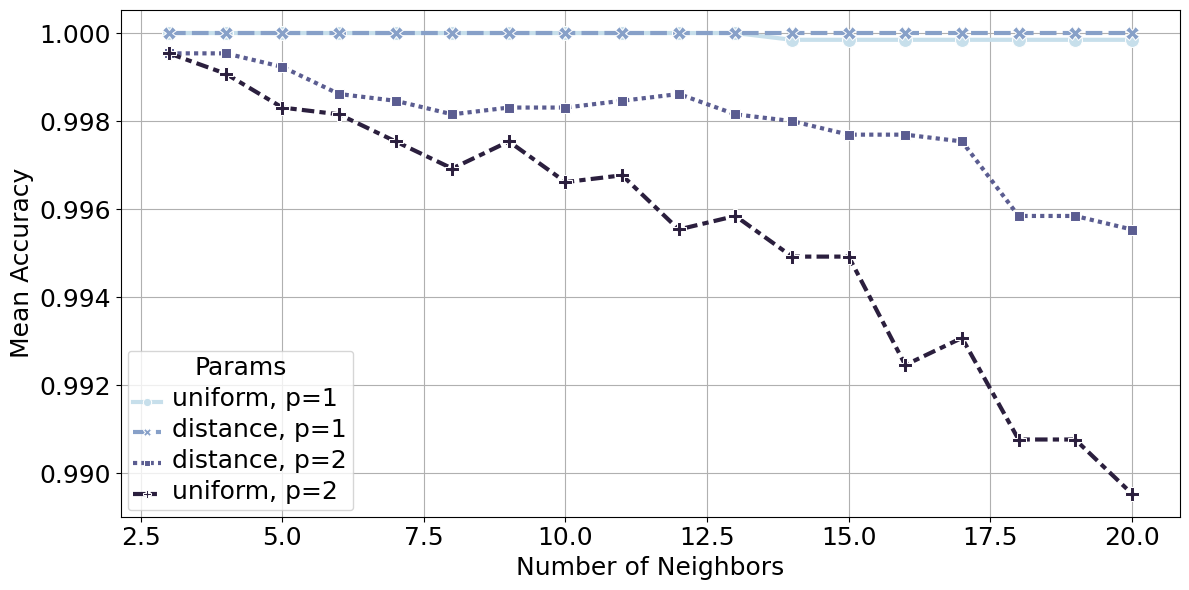

In [9]:
results_df = pd.read_csv("grid_results/_KNN.csv")
results_df = results_df.sort_values(by=['rank_test_score'])
results_df['Params'] = results_df['param_weights'].astype(str) + ', p=' + results_df['param_p'].astype(str)
results_df
plt.figure(figsize=(12, 6))
plt.grid()
ax = sns.lineplot(
    data=results_df,
    x='param_n_neighbors',
    y='mean_test_score',
    hue='Params',
    style='Params',
    markers=True,
    dashes=True, linewidth=3,palette='ch:s=.25,rot=-.25')
for line in ax.lines:
    line.set_markersize(10)
plt.xlabel('Number of Neighbors', fontsize = 18)
plt.ylabel('Mean Accuracy', fontsize = 18)
plt.setp(ax.get_legend().get_texts(), fontsize='18') 
plt.setp(ax.get_legend().get_title(), fontsize='18') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig(f"results\grid_knn.png") 
plt.show()

### AdaBoost

<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\g'
C:\Users\olahe\AppData\Local\Temp\ipykernel_8056\2114045065.py:28: SyntaxWarning: invalid escape sequence '\g'
  plt.savefig(f"results\grid2_ada.png")


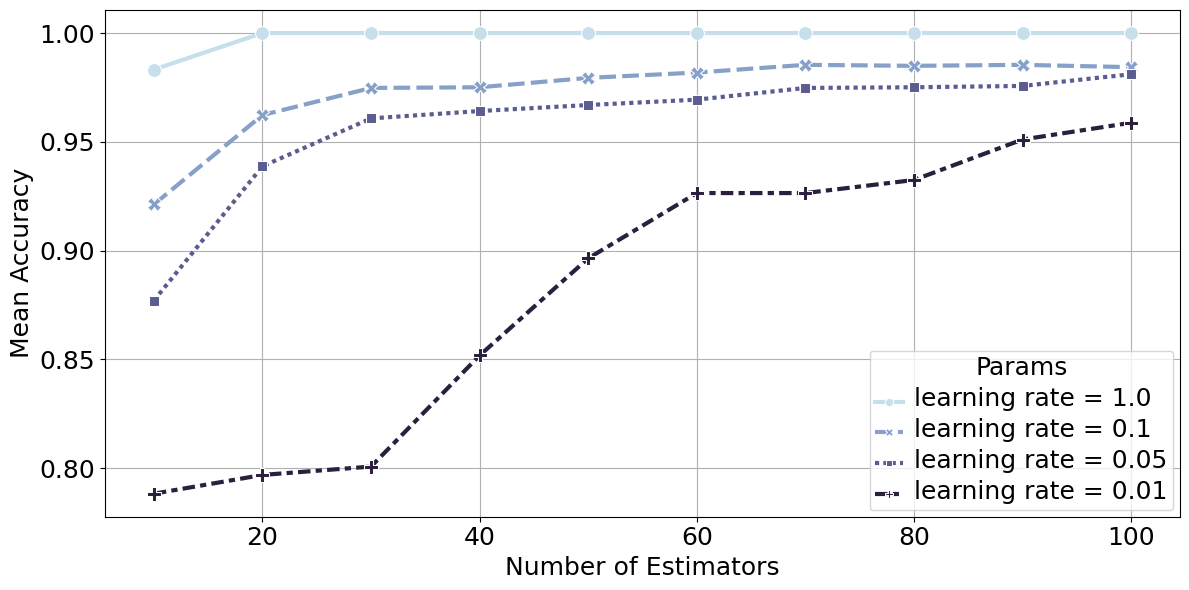

In [2]:
results_df = pd.read_csv("grid_results/test2_AdaBoost.csv")
results_df = results_df.sort_values(by=['rank_test_score'])
results_df.head()
results_df['Params'] = "learning rate = " + results_df['param_learning_rate'].astype(str)

results_df
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=results_df,
    x='param_n_estimators',
    y='mean_test_score',
    style='Params',
    hue = "Params",
    markers=True,
    dashes=True, linewidth=3,palette='ch:s=.25,rot=-.25')
plt.grid()

for line in ax.lines:
    line.set_markersize(10)

plt.xlabel('Number of Estimators', fontsize = 18)
plt.ylabel('Mean Accuracy', fontsize = 18)
plt.setp(ax.get_legend().get_texts(), fontsize='18') 
plt.setp(ax.get_legend().get_title(), fontsize='18') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig(f"results\grid2_ada.png") 
plt.show()

### Logistic

<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:26: SyntaxWarning: invalid escape sequence '\g'
C:\Users\olahe\AppData\Local\Temp\ipykernel_32492\426695376.py:26: SyntaxWarning: invalid escape sequence '\g'
  plt.savefig(f"results\grid_logistic2.png")


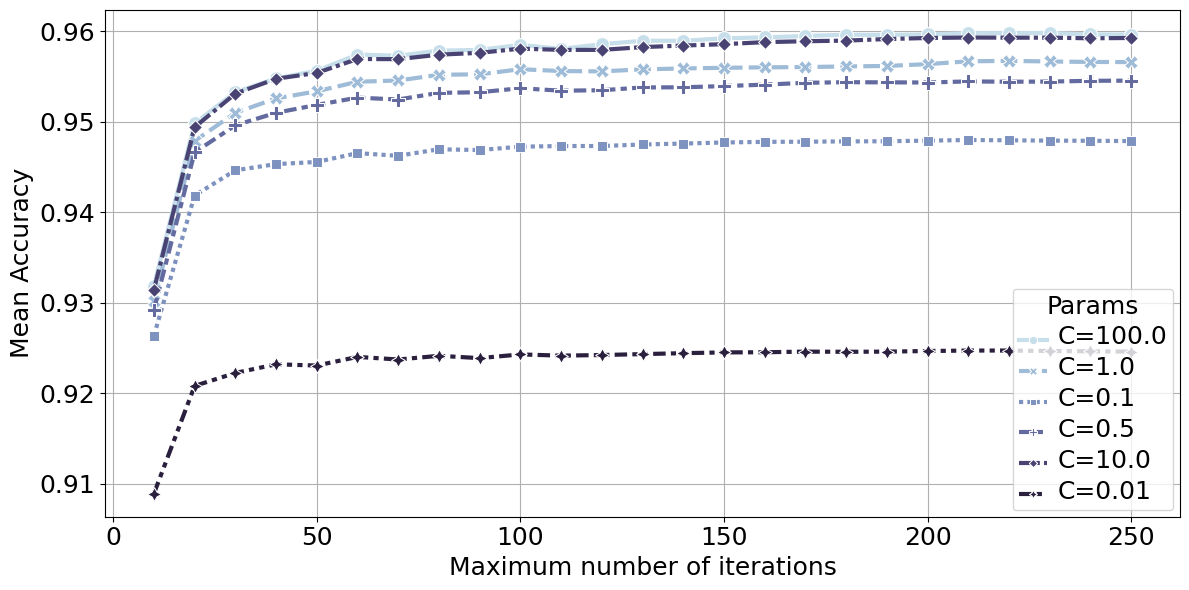

In [2]:
results_df = pd.read_csv("grid_results/test_lat_Logistic regression.csv")
results_df = results_df.sort_values(by=['rank_test_score'])
results_df.head()
results_df['Params'] = "C=" + results_df['param_C'].astype(str)

results_df
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=results_df,
    x='param_max_iter',
    y='mean_test_score',
    style='Params',
    hue = "Params",
    markers=True,
    dashes=True, linewidth=3,palette='ch:s=.25,rot=-.25', errorbar=None)
for line in ax.lines:
    line.set_markersize(10)
plt.xlabel('Maximum number of iterations', fontsize = 18)
plt.ylabel('Mean Accuracy', fontsize = 18)
plt.grid()
plt.setp(ax.get_legend().get_texts(), fontsize='18') 
plt.setp(ax.get_legend().get_title(), fontsize='18') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig(f"results\grid_logistic2.png") 
plt.show()

### Decision Tree

C:\Users\olahe\AppData\Local\Temp\ipykernel_37452\3272070345.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Config'] = (
C:\Users\olahe\AppData\Local\Temp\ipykernel_37452\3272070345.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Config'] = (


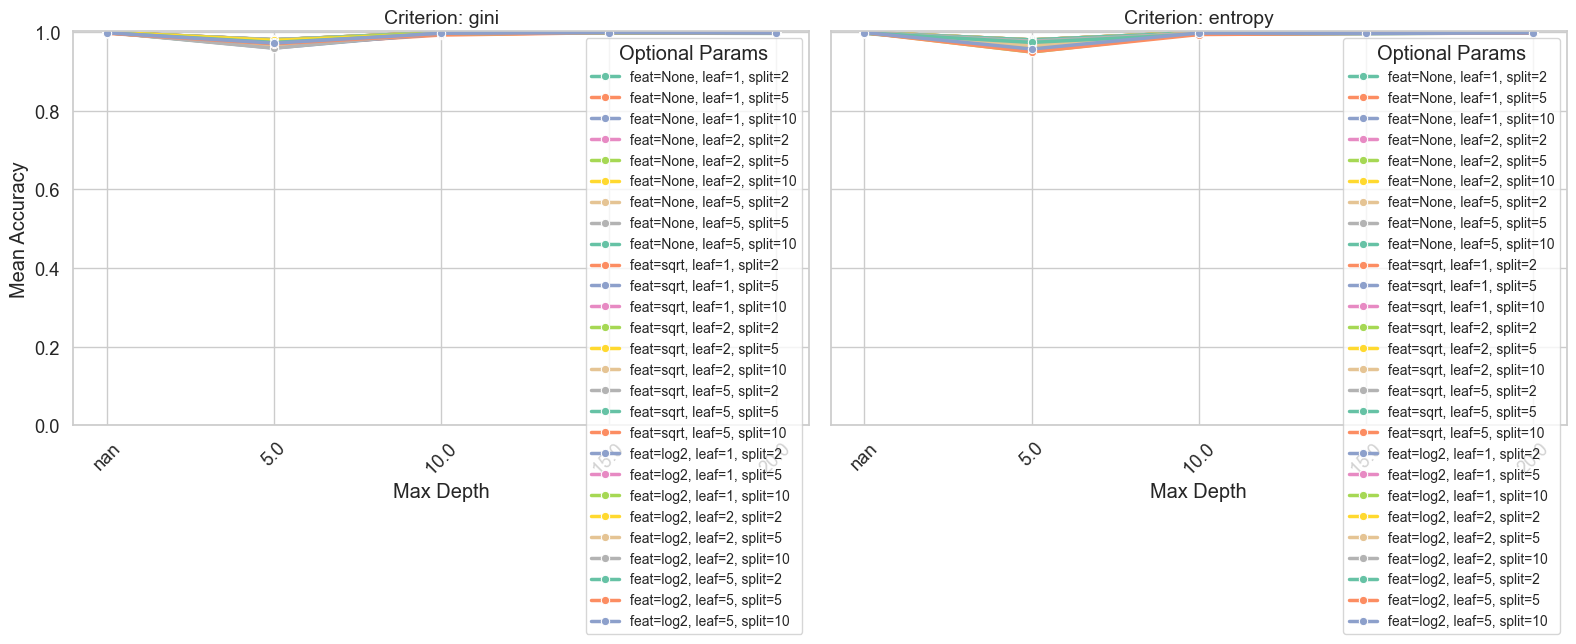

In [71]:
df = pd.read_csv("grid_results/june_DecisionTree.csv")
df = df.where(pd.notnull(df), None)  # prawdziwe None, nie string

# Filtruj tylko potrzebne kolumny
df = df[['param_criterion', 'param_max_depth', 'param_max_features',
         'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

# Konwertuj typy (opcjonalnie, jeśli są stringami liczb)
df['param_max_depth'] = df['param_max_depth'].astype(str)

# Ustawienia rysunku
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.set(style='whitegrid', font_scale=1.2)

# Dla każdego kryterium (gini, entropy)
for ax, criterion in zip(axes, ['gini', 'entropy']):
    subset = df[df['param_criterion'] == criterion]
    
    # Utwórz kolumnę opisującą pozostałe parametry (do legendy)
    subset['Config'] = (
        'feat=' + subset['param_max_features'].astype(str) +
        ', leaf=' + subset['param_min_samples_leaf'].astype(str) +
        ', split=' + subset['param_min_samples_split'].astype(str)
    )

    sns.lineplot(
        data=subset,
        x='param_max_depth',
        y='mean_test_score',
        hue='Config',
        marker='o',
        ax=ax,
        palette='Set2',
        linewidth=2.5
    )

    ax.set_title(f'Criterion: {criterion}', fontsize=14)
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Mean Accuracy')
    ax.set_ylim(bottom=0)  # ⬅️ y od zera
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='best', fontsize=10, title='Optional Params')

plt.tight_layout()
plt.show()

In [63]:
results_df = pd.read_csv("grid_results/june_DecisionTree.csv")
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = results_df.where(pd.notnull(results_df), None)
results_df.fillna('None')

results_df.head()

,Unnamed: 0,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,mean_fit_time,rank_test_score
0,0,gini,NaN,None,1,2,1.0,0.023222,1
1,1,gini,NaN,None,1,5,1.0,0.017934,1
3,3,gini,NaN,None,2,2,1.0,0.017039,1
4,4,gini,NaN,None,2,5,1.0,0.023371,1
10,10,gini,NaN,sqrt,1,5,1.0,0.014050,1


In [ ]:

results_df
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=results_df,
    x='param_max_iter',
    y='mean_test_score',
    style='Params',
    markers=True,
    dashes=True, linewidth=3,palette='ch:s=.25,rot=-.25', errorbar=None)
for line in ax.lines:
    line.set_markersize(10)
plt.xlabel('Maximum number of iterations', fontsize = 18)
plt.ylabel('Mean Accuracy', fontsize = 18)
plt.grid()
plt.setp(ax.get_legend().get_texts(), fontsize='18') 
plt.setp(ax.get_legend().get_title(), fontsize='18') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig(f"results\grid_decision_tree.png") 
plt.show()

,Unnamed: 0,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,mean_fit_time,rank_test_score
0,0,gini,NaN,NaN,1,2,1.000000,0.023222,1
1,1,gini,NaN,NaN,1,5,1.000000,0.017934,1
3,3,gini,NaN,NaN,2,2,1.000000,0.017039,1
4,4,gini,NaN,NaN,2,5,1.000000,0.023371,1
10,10,gini,NaN,sqrt,1,5,1.000000,0.014050,1
...,...,...,...,...,...,...,...,...,...
179,179,entropy,5.0,sqrt,5,10,0.957679,0.010506,266
188,188,entropy,5.0,log2,5,10,0.957375,0.022115,267
171,171,entropy,5.0,sqrt,1,2,0.952613,0.010373,268
187,187,entropy,5.0,log2,5,5,0.949996,0.009103,269


### Random 

In [68]:
results_df = pd.read_csv("grid_results/june_RandomForest.csv")
results_df = results_df.sort_values(by=['rank_test_score'])
results_df.head()
results_df = results_df.where(pd.notnull(results_df), None)
#results_df.fillna('None')
results_df['Params'] = "max_depth = " + results_df['param_max_depth'].astype(str)
results_df

,Unnamed: 0,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,mean_fit_time,rank_test_score,Params
448,448,20.0,None,1,10,150,1.000000,4.230743,1,max_depth = 20.0
449,449,20.0,None,1,10,200,1.000000,6.373545,1,max_depth = 20.0
450,450,20.0,None,2,2,10,1.000000,0.282581,1,max_depth = 20.0
451,451,20.0,None,2,2,25,1.000000,0.822658,1,max_depth = 20.0
452,452,20.0,None,2,2,50,1.000000,1.272217,1,max_depth = 20.0
...,...,...,...,...,...,...,...,...,...,...
444,444,20.0,None,1,10,10,0.999384,0.209189,482,max_depth = 20.0
366,366,20.0,sqrt,4,5,10,0.999231,0.103397,483,max_depth = 20.0
468,468,20.0,None,4,2,10,0.999230,0.304781,484,max_depth = 20.0
258,258,10.0,log2,4,5,10,0.998923,0.163184,485,max_depth = 10.0


<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\olahe\AppData\Local\Temp\ipykernel_37452\3989738146.py:14: SyntaxWarning: invalid escape sequence '\g'
  plt.savefig(f"results\grid_random.png")
C:\Users\olahe\AppData\Local\Temp\ipykernel_37452\3989738146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x=param, y='mean_test_score', palette='ch:s=.25,rot=-.25')
C:\Users\olahe\AppData\Local\Temp\ipykernel_37452\3989738146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x=param, y='mean_test_score', palette='ch:s=.25,rot=-.25')
C:\Users\olahe\AppData\Local\Temp\ipykernel_37452\3989738146.py:

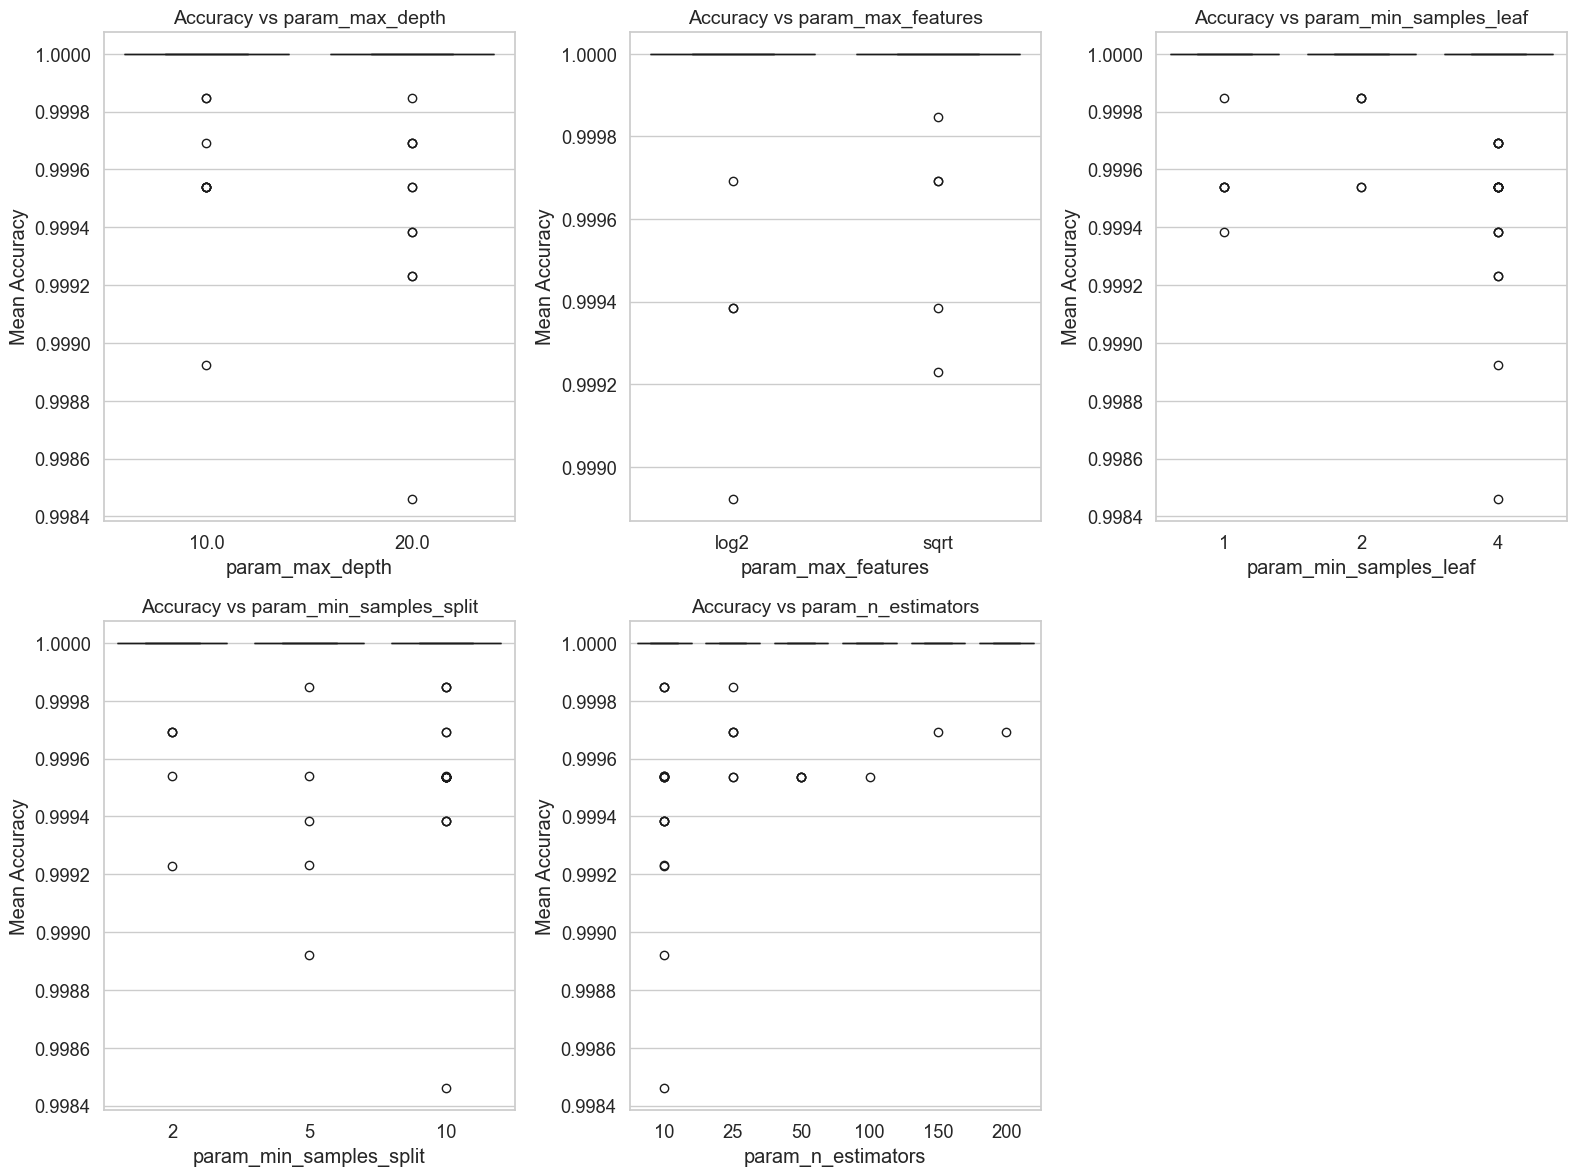

In [70]:


plt.figure(figsize=(16, 12))
sns.set(style="whitegrid", font_scale=1.2)

params = ['param_max_depth','param_max_features',	'param_min_samples_leaf',	'param_min_samples_split',	'param_n_estimators']

for i, param in enumerate(params, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(data=results_df, x=param, y='mean_test_score', palette='ch:s=.25,rot=-.25')
    plt.title(f'Accuracy vs {param}', fontsize=14)
    plt.xlabel(param)
    plt.ylabel('Mean Accuracy')

plt.tight_layout()
plt.savefig(f"results\grid_random.png") 
plt.show()

### SVM

<>:19: SyntaxWarning: invalid escape sequence '\g'
<>:19: SyntaxWarning: invalid escape sequence '\g'
C:\Users\olahe\AppData\Local\Temp\ipykernel_9240\1151964781.py:19: SyntaxWarning: invalid escape sequence '\g'
  plt.savefig(f"results\grid_svm.png")
C:\Users\olahe\AppData\Local\Temp\ipykernel_9240\1151964781.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x=param, y='mean_test_score', palette='ch:s=.25,rot=-.25')
C:\Users\olahe\AppData\Local\Temp\ipykernel_9240\1151964781.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x=param, y='mean_test_score', palette='ch:s=.25,rot=-.25')
C:\Users\olahe\AppData\Local\Temp\ipykernel_9240\1151964781.py:13: F

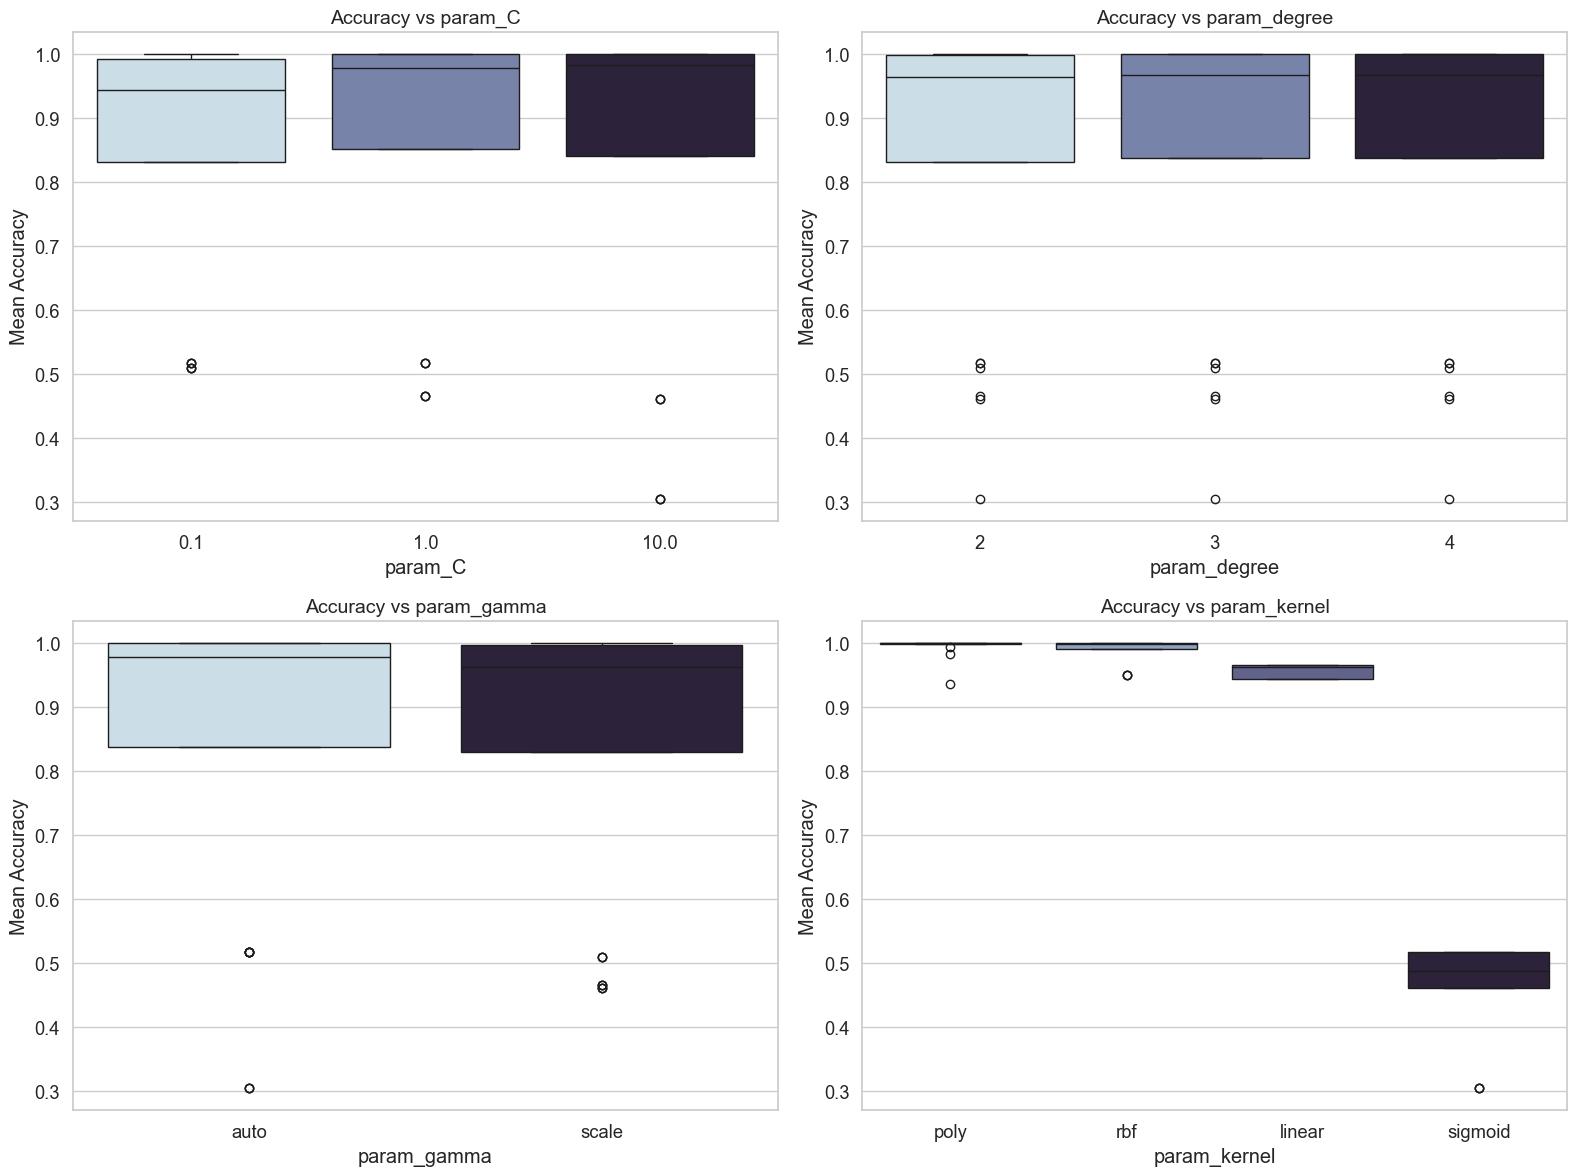

In [17]:
results_df = pd.read_csv("grid_results/_SVM.csv")
results_df = results_df.sort_values(by=['rank_test_score'])
results_df['Params'] = results_df['param_kernel'].astype(str)  + ", d:" + results_df['param_degree'].astype(str) + ", g:" + results_df['param_gamma'].astype(str)
results_df

plt.figure(figsize=(16, 12))
sns.set(style="whitegrid", font_scale=1.2)

params = ['param_C', 'param_degree', 'param_gamma', 'param_kernel']

for i, param in enumerate(params, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=results_df, x=param, y='mean_test_score', palette='ch:s=.25,rot=-.25')
    plt.title(f'Accuracy vs {param}', fontsize=14)
    plt.xlabel(param)
    plt.ylabel('Mean Accuracy')

plt.tight_layout()
plt.savefig(f"results\grid_svm.png") 
plt.show()
